In [1]:
Author -Reetu Khatri

SyntaxError: invalid syntax (825980514.py, line 1)

# importing libaraies

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# loading the dataset

In [4]:
df=pd.read_csv(r"C:\Users\Suman\spam.csv")

In [5]:
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
df=pd.read_csv("spam.csv")

# Finding the shape of dataset ( here 5572 rows and 2 columns are availble)

In [7]:
df.shape

(5572, 2)

# Cheking the null values

In [8]:
df.isnull()

,Category,Message
0,False,False
1,False,False
2,False,False
3,False,False
4,False,False
...,...,...
5567,False,False
5568,False,False
5569,False,False
5570,False,False


In [38]:
target = 'spam'
labels = ['Ham','Spam']
features = [i for i in df.columns.values if i not in [target]]

original_df = df.copy(deep=True)
display(df.head())

print('\n\033[1mInference:\033[0m The Datset consists of {} features & {} samples.'.format(df.shape[1], df.shape[0]))

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0



Inference: The Datset consists of 3 features & 5572 samples.


In [40]:
#Checking number of unique rows in each feature

nu = df[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; #numerical & categorical features

for i in range(df[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m The Datset has {} numerical & {} categorical features.'.format(len(nf),len(cf)))


Inference: The Datset has 1 numerical & 2 categorical features.


In [9]:
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [ ]:
# columns name

In [10]:
df.columns

Index(['Category', 'Message'], dtype='object')

# finding the info of dataset

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [ ]:
# Dropped The Column Unnamed: 0

In [12]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [ ]:
# adding the column where if spam =1 or else 0

In [ ]:
# Finding the statistical info of the data set

In [35]:
df.describe()

,Spam
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [20]:
df['Spam']=df['Category'].apply(lambda x:1 if x=='spam' else 0)
df['Spam']



0       0
1       0
2       1
3       0
4       0
       ..
5567    1
5568    0
5569    0
5570    0
5571    0
Name: Spam, Length: 5572, dtype: int64

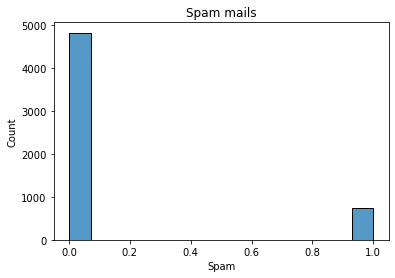

In [23]:
sns.histplot(df['Spam'])
plt.title('Spam mails')
plt.show()

In [24]:
df.head()

,Category,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [25]:
from sklearn.model_selection import train_test_split

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(df.Message,df.Spam,test_size=0.25)

In [27]:
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer

#  CountVectorizer

# Naïve Bayes Classifier Algorithm

Naive Bayes Have three Classifier(Bernouli,Multinominal,Gaussian) Here I use Multinominal Bayes Because here data in a discrete form discrete data(e.g movie ratings ranging 1 to 5 as each rating will have certain frequency to represent)

In [28]:
from sklearn.naive_bayes import MultinomialNB

In [29]:
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [30]:
from sklearn.pipeline import Pipeline
Clf= Pipeline([('vectorizer',CountVectorizer()),
              ('nb',MultinomialNB())
              ])

 # Tarining The Model

In [31]:
Clf.fit(X_train,y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [ ]:
#Here I given 5 email Two detect 1st One is looking good and the other one looking spam

# Predict Email

In [32]:
Emails=  ['Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]

In [33]:
Clf.predict(Emails)

array([0, 1], dtype=int64)

# Prediction Of Model

In [34]:
Clf.score(X_test,y_test)

0.9842067480258435